# Libraries

In [26]:
# Libraries
import mysql.connector
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io.wavfile import write
import IPython.display as ipd
import ffmpeg

# Cities Dataset

In [27]:
with open("cities.txt", "r", encoding="utf-8") as file:
    content = file.readlines()

city_names = [line.strip() for line in content if line.strip()]

print(city_names)


['LAHORE', 'RAWALPINDI', 'KARACHI', 'MULTAN', 'FAISALABAD', 'PESHAWAR', 'SARGODHA', 'ABBOTTABAD', 'SIALKOT', 'BAHAWALPUR', 'HYDERABAD', 'SAHIWAL', 'SUKKUR', 'SWAT', 'DERA ISMAIL KHAN', 'CHOWK BAHADURPUR', 'DERA GHAZI KHAN', 'GUJRANWALA', 'GUJRAT', 'JHANG', 'SADIQABAD', 'OKARA CITY', 'JHELUM', 'MURREE', 'KHANEWAL', 'DASKA', 'MORO', 'KHAN PUR', 'BHAKKAR', 'BATKHELA', 'HYDERABAD', 'Muzaffargarh', 'AHMED PUR EAST', 'BHALWAL', 'KOHAT', 'BARIKOT', 'GHANDI CHOWK', 'SAKRAND', 'SHAH MAQSOOD']


# Database Functions

In [28]:
def connect_to_database():
    try:
        connection = mysql.connector.connect(
            host="localhost",      
            user="root",           
            password="kinghamzafami1a",  
            database="bus_reservation_system"
        )
        print("Database connection successful!")
        return connection
    except mysql.connector.Error as err:
        print(f"Error: {err}")
        return None

# Function to fetch schedule data based on user source and destination location
def fetch_schedule_data(connection,query):
    try:
        cursor = connection.cursor()
        cursor.execute(query)
        schedule_data = cursor.fetchall()
        cursor.close()
        return schedule_data
    except mysql.connector.Error as err:
        print(f"Error: {err}")
        return []
    
def fetch_fares_data(connection):
    try:
        cursor = connection.cursor()
        cursor.execute("SELECT start_city, end_city, fare, departure_date, departure_time,capacity FROM schedule,bus where bus.id = schedule.bus_id;")
        schedule_data = cursor.fetchall()
        cursor.close()
        return schedule_data
    except mysql.connector.Error as err:
        print(f"Error: {err}")
        return []    


# Bus Fares Plot

In [29]:
def plot_city_fares(schedule_data):
    if not schedule_data:
        print("No schedule data to plot.")
        return

    # Create a directed graph
    graph = nx.DiGraph()

    # Add edges with fares as labels
    for row in schedule_data:
        start_city = row[0]
        end_city = row[1]
        fare = float(row[2])
        graph.add_edge(start_city, end_city, fare=fare)

    # Draw the graph
    pos = nx.spring_layout(graph)  # Layout for better visualization
    plt.figure(figsize=(12, 8))

    # Draw nodes and edges
    nx.draw_networkx_nodes(graph, pos, node_size=700, node_color="skyblue")
    nx.draw_networkx_edges(graph, pos, arrowstyle="->", arrowsize=20, edge_color="gray")
    nx.draw_networkx_labels(graph, pos, font_size=10, font_color="black", font_weight="bold")

    # Add edge labels (fares)
    edge_labels = nx.get_edge_attributes(graph, "fare")
    nx.draw_networkx_edge_labels(graph, pos, edge_labels={(u, v): f"PKR {d}" for u, v, d in graph.edges(data="fare")})

    # Plot aesthetics
    plt.title("Bus Fares Between Cities", fontsize=16)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

Database connection successful!
Fetched Schedule Data:
From Karachi to Lahore | Fare: PKR 3500.00 | Date: 2024-11-30 | Time: 8:00:00 | Capacity: 40
From Sialkot to Hyderabad | Fare: PKR 4000.00 | Date: 2024-12-04 | Time: 6:00:00 | Capacity: 40
From LAHORE to ABBOTTABAD | Fare: PKR 4817.60 | Date: 2024-12-19 | Time: 12:14:00 | Capacity: 40
From RAWALPINDI to BAHAWALPUR | Fare: PKR 4912.05 | Date: 2024-12-07 | Time: 10:10:00 | Capacity: 40
From RAWALPINDI to MURREE | Fare: PKR 1118.68 | Date: 2024-12-15 | Time: 14:28:00 | Capacity: 40
From RAWALPINDI to KOHAT | Fare: PKR 1756.51 | Date: 2024-12-09 | Time: 12:58:00 | Capacity: 40
From KARACHI to SIALKOT | Fare: PKR 3060.10 | Date: 2024-12-06 | Time: 13:42:00 | Capacity: 40
From KARACHI to SWAT | Fare: PKR 4261.34 | Date: 2024-12-20 | Time: 7:47:00 | Capacity: 40
From KARACHI to DASKA | Fare: PKR 3106.63 | Date: 2024-12-17 | Time: 9:31:00 | Capacity: 40
From KARACHI to BHAKKAR | Fare: PKR 4422.19 | Date: 2024-12-26 | Time: 7:19:00 | Capaci

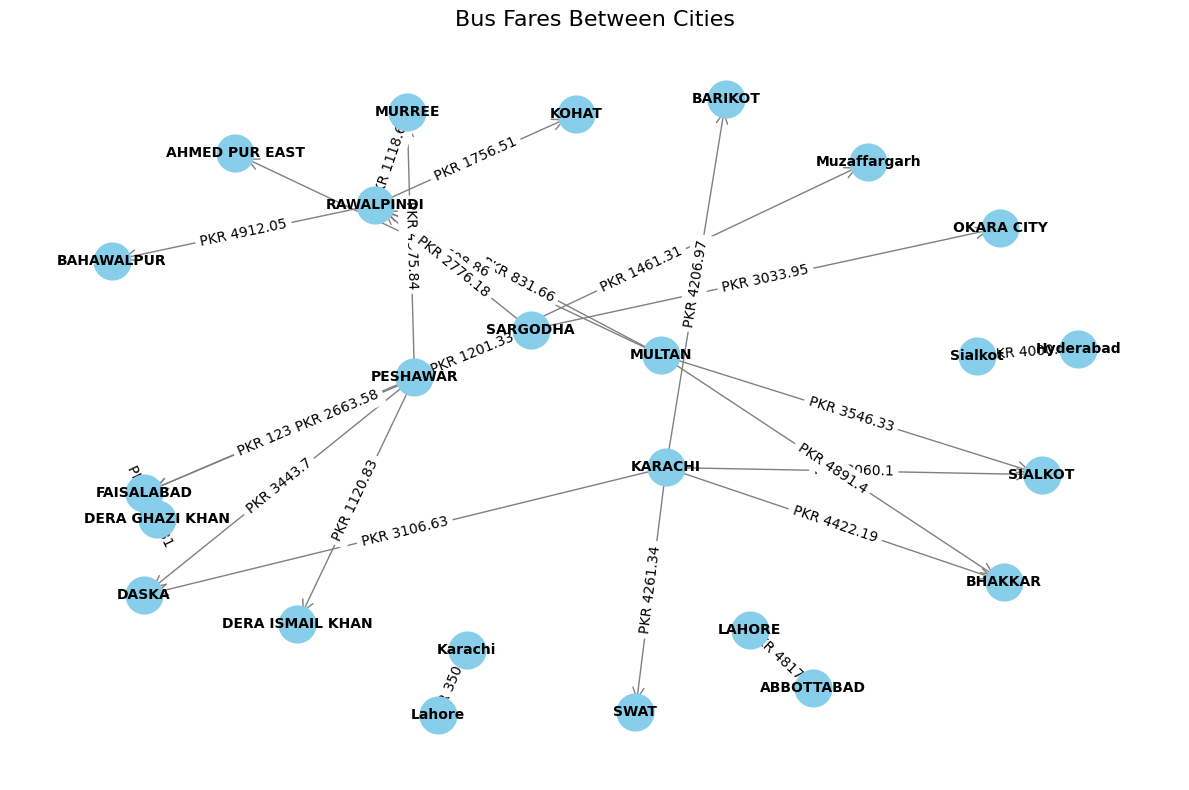

In [34]:
schedule_data=None
connection = connect_to_database()
if connection:
    schedule_data = fetch_fares_data(connection)
    print("Fetched Schedule Data:")
    for row in schedule_data[0:15]:
            print(f"From {row[0]} to {row[1]} | Fare: PKR {row[2]} | Date: {row[3]} | Time: {row[4]} | Capacity: {row[5]}")
        
    plot_city_fares(schedule_data[0:25])
        
    connection.close()

In [6]:
# Select schedule number from translation
def select_schedule_number(translation):
    word_to_id = {
        "first": 1,
        "second": 2,
        "third": 3,
        "fourth": 4,
        "fifth": 5,
        "sixth": 6,
        "seventh": 7,
        "eighth": 8,
        "ninth": 9,
        "tenth": 10
    }
    translation = translation.lower()

    for word, num_id in word_to_id.items():
        if word in translation:
            return num_id

    return None

In [7]:
# Calculate Payment
def calculate_payment(fare,nos):
    return fare*nos

# Main Code

In [8]:
#name=input("Enter you name:")
print("Entered Name : Hamza")
#voice1=input("Where do you want to go?")
print("User spoke: I want to go to lahore from islamabad on 30th November")
# whisper voice
#llm query
query = "SELECT start_city, end_city, fare, departure_date, departure_time,capacity FROM schedule,bus where bus.id = schedule.bus_id and start_city='islamabad' and end_city='multan' and departure_date='2024-12-01';"
schedule_data=None
connection = connect_to_database()
if connection:
    schedule_data = fetch_schedule_data(connection,query)
for (i,row) in enumerate(schedule_data):
            print("ID:",i+1,"|",f"From {row[0]} to {row[1]} | Fare: PKR {row[2]} | Date: {row[3]} | Time: {row[4]} | Capacity: {row[5]}")

bus_number=1
print("User Spoke: I will take the first bus")
print("User entered the number of seats to book: 3")
seats=3
print(schedule_data[bus_number-1][5])
if (seats<schedule_data[bus_number-1][5]) :
    print("seats booked")
else:
    print("No capacity left in the bus")
print("Payment : ",calculate_payment(schedule_data[bus_number-1][2],seats))    




Entered Name : Hamza
User spoke: I want to go to lahore from islamabad on 30th November
Database connection successful!
ID: 1 | From Islamabad to Multan | Fare: PKR 1500.00 | Date: 2024-12-01 | Time: 10:30:00 | Capacity: 45
User Spoke: I will take the first bus
User entered the number of seats to book: 3
45
seats booked
Payment :  4500.00


In [9]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("automatic-speech-recognition", model="openai/whisper-small")

e:\gen ai project\gen\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu


In [14]:
duration = 5  # seconds
sample_rate = 44100  # Hz
print("Recording...")
audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=2, dtype='int16')
sd.wait()  # Wait until recording is finished
print("Recording completed.")
write("output.wav", sample_rate, audio)


Recording...
Recording completed.


In [15]:
import ffmpeg
pipe('output.wav')

{'text': ' I want to go to Arifwala from Janawala tomorrow.'}

In [ ]:
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Initialize the tokenizer from Hugging Face Transformers library
tokenizer = T5Tokenizer.from_pretrained('t5-small')

# Load the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = T5ForConditionalGeneration.from_pretrained('cssupport/t5-small-awesome-text-to-sql')
model = model.to(device)
model.eval()

def generate_sql(input_prompt):
    # Tokenize the input prompt
    inputs = tokenizer(input_prompt, padding=True, truncation=True, return_tensors="pt").to(device)
    
    # Forward pass
    with torch.no_grad():
        outputs = model.generate(**inputs, max_length=512)
    
    # Decode the output IDs to a string (SQL query in this case)
    generated_sql = tokenizer.decode(outputs[0], skip_special_tokens=True)
    
    return generated_sql

input_prompt = '''tables:\n + "CREATE TABLE `schedule` (
    `id` INT AUTO_INCREMENT PRIMARY KEY,
    `start_city` VARCHAR(100) NOT NULL,
    `end_city` VARCHAR(100) NOT NULL,
    `bus_id` INT NOT NULL,
    `fare` DECIMAL(10, 2) NOT NULL,
    `departure_date` DATE NOT NULL,
    `departure_time` TIME NOT NULL,
    FOREIGN KEY (`bus_id`) REFERENCES `bus`(`id`)
); + "\n" + "sample query for:" + "I want to take a bus from city 'lahore' to city 'faisalabad' on 12 december"
"\n"Generated Query: select * from schedule where start_city=lahore and end_city=faisalabad and departure_date=12-12-2024
"\n"
Now generate for the query below:
Query for: I want to take a bus from city 'chakwal' to city 'islamabad' on 24 december
'''

generated_sql = generate_sql(input_prompt)

print(f"The generated SQL query is: {generated_sql}")


The generated SQL query is: SELECT bus_id FROM schedule WHERE city = "lahore" AND end_city = "islamabad" AND departure_date = "24 december"


In [14]:
import re
from datetime import datetime

# List of cities in Pakistan
PAKISTANI_CITIES = [
    "lahore", "islamabad", "karachi", "peshawar", "quetta", "multan", "faisalabad", 
    "rawalpindi", "hyderabad", "gujranwala", "sialkot", "bahawalpur", "sukkur"
]

def extract_trip_details(input_text):
    # Convert text to lowercase for easier matching
    text = input_text.lower()

    # Extract date in the format '12 december' or '12 dec'
    date_match = re.search(r'\b(\d{1,2})\s+(january|february|march|april|may|june|july|august|september|october|november|december)\b', text)
    if not date_match:
        return None, None, None  # If date not found

    day = int(date_match.group(1))
    month_str = date_match.group(2)
    # Convert month to number
    month = datetime.strptime(month_str, "%B").month

    # Build date as 2024-MM-DD
    trip_date = f"2024-{month:02d}-{day:02d}"

    # Extract cities
    found_cities = [city for city in PAKISTANI_CITIES if city in text]
    if len(found_cities) < 2:
        return None, None, trip_date  # Return available info if not enough cities found

    # Assign cities
    start_city = found_cities[0]
    end_city = found_cities[1]

    return start_city, end_city, trip_date

# Example usage
input_text = "I want to take a bus from rawalpindi to sialkot on 24 november"
start_city, end_city, trip_date = extract_trip_details(input_text)

print(f"Start City: {start_city}")
print(f"End City: {end_city}")
print(f"Trip Date: {trip_date}")


Start City: rawalpindi
End City: sialkot
Trip Date: 2024-11-24


In [2]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text2text-generation", model="cssupport/t5-small-awesome-text-to-sql")

pipe('''I have a sql table schedule like this : CREATE TABLE `schedule` (
    `id` INT AUTO_INCREMENT PRIMARY KEY,
    `start_city` VARCHAR(100) NOT NULL,
    `end_city` VARCHAR(100) NOT NULL,
    `bus_id` INT NOT NULL,
    `fare` DECIMAL(10, 2) NOT NULL,
    `departure_date` DATE NOT NULL,
    `departure_time` TIME NOT NULL,
    FOREIGN KEY (`bus_id`) REFERENCES `bus`(`id`))
     User input : I want to go to islamabad from karachi on 28th December 
     Sql query generated:Select * from schedule where start_city=karachi and end_city=islamabad and departure_date=28 December
     User input : I want to go to lahore from kohat on 21th September 
     Generated Sql query : ''')

Device set to use cpu


[{'generated_text': 'SELECT SUM(SQL) FROM schedule WHER'}]

In [3]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-generation", model="rakeshkiriyath/gpt2Medium_text_to_sql")
pipe('''I have a sql table schedule like this : CREATE TABLE `schedule` (
    `id` INT AUTO_INCREMENT PRIMARY KEY,
    `start_city` VARCHAR(100) NOT NULL,
    `end_city` VARCHAR(100) NOT NULL,
    `bus_id` INT NOT NULL,
    `fare` DECIMAL(10, 2) NOT NULL,
    `departure_date` DATE NOT NULL,
    `departure_time` TIME NOT NULL,
    FOREIGN KEY (`bus_id`) REFERENCES `bus`(`id`))
     User input : I want to go to islamabad from karachi on 28th December 
     Sql query generated:Select * from schedule where start_city=karachi and end_city=islamabad and departure_date=28 December
     User input : I want to go to lahore from kohat on 21th September 
     Generated Sql query : ''')

e:\gen ai project\gen\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Nutech\.cache\huggingface\hub\models--rakeshkiriyath--gpt2Medium_text_to_sql. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Error while downloading from https://cdn-lfs-us-1.hf.co/repos/87/bd/87bdc59cafa2ba8b4e0e2fdf6fe6ecff5857e1e8

ValueError: Input length of input_ids is 259, but `max_length` is set to 50. This can lead to unexpected behavior. You should consider increasing `max_length` or, better yet, setting `max_new_tokens`.